About to build my own svm. God abeg


In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
class Support_Vector_Machine:
    def __init__(self, visualize = True):
        self.visualize= visualize
        self.colors = {1:'r', -1: 'b'}
        if self.visualize:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)

    def fit(self, data):
        self.data =  data
        opt_dict = {}

        transforms = [[1,1],[1,-1], [-1,1], [-1,-1]]
        all_data = []

        for yi in self.data:
            for feature_set in self.data[yi]:
                for feature in feature_set:
                    all_data.append(feature)

        self.max_feature =  max(all_data)
        self.min_feature =  min(all_data)

        all_data = None
        
        step_sizes = [self.max_feature * 0.1,
                      self.max_feature * 0.01,
                      self.max_feature * 0.001]
        
        b_range_multiple = 5
        b_multiple = 5
        latest_optimum =  self.max_feature * 10

        #this is where we try to solve the optimization problem
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False
            
            while not optimized:
                for b in np.arange(-1*(self.max_feature*b_range_multiple), self.max_feature*b_range_multiple, step*b_multiple ):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option =  True
                        for i in self.data:
                            for xi in self.data[i]:
                                yi  = i
                                if not yi*(np.dot(w_t, xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]  
                      

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step')
                else:
                    w=w-step
            
            norms  = sorted([n for n in opt_dict])
            opt_choice =  opt_dict[norms[0]]
            self.w =  opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum =  opt_choice[0][0] + step*2

                

        
    def predicit(self, features):
        classification = np.sign(np.dot(np.array(features), self.w)+ self.b)
        if classification != 0 and self.visualize:
            self.ax.scatter(features[0], features[1], s=200, marker="*", c= self.colors[classification])
        return classification
    
    def visualization(self):
        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in data_dict[i]] for i in data_dict] 
            
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
            
        datarange =  (self.min_feature*0.9, self.max_feature*1.1)
        hyp_x_min =  datarange[0]
        hyp_x_max = datarange[1]

        #creating the hyperplane
        #postive support vector hyperplane (w.x+b) = 1
        psv1 =  hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 =  hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2])

        #negative support vector hyperplane (w.x+b) = -1
        nsv1 =  hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 =  hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2])

        #decison boundry support vector hyperplane (w.x+b) = 0
        db1 =  hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 =  hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2])

        plt.show()

        

In [50]:
data_dict = {-1: np.array([[1,7],
                           [2,8],
                           [3,8]]),

            1:  np.array([[5,1],
                           [6,-1],
                           [7,3]])}

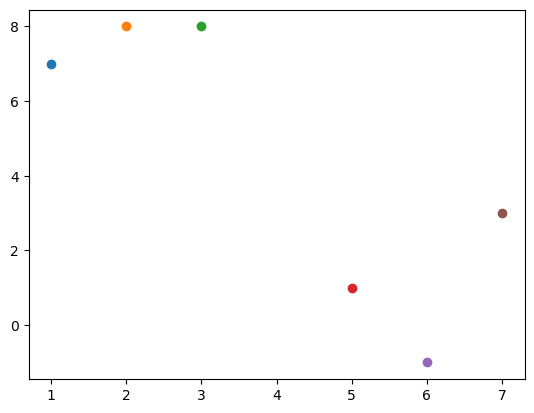

In [51]:
for i in data_dict:
    for x in data_dict[i]:
        plt.scatter(x[0], x[1])

Optimized a step
Optimized a step
Optimized a step


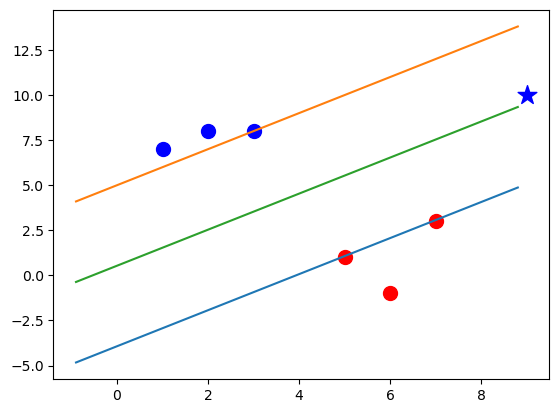

In [53]:
clf = Support_Vector_Machine()
clf.fit(data=data_dict)
clf.predicit([9,10])
clf.visualization()